In [42]:
#Importing the initial libraries needed
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Import dataset

In [43]:
dataframe=pd.read_csv("./heart.csv")
dataframe.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


###  Imports needed for pre processing of data

In [44]:
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

### List the type of attributes

In [45]:
dataframe.dtypes


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

###### Convert from object to string

In [46]:
dataframe[dataframe.select_dtypes(include="object").columns]=dataframe[dataframe.select_dtypes(include="object").columns].astype("string")

In [47]:
categorical_columns=dataframe.select_dtypes("string").columns.to_list()
numerical_col=dataframe.select_dtypes("int64").columns.to_list()
numerical_col=numerical_col+dataframe.select_dtypes("float64").columns.to_list()
dataframe.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [48]:
px.imshow(dataframe.corr(),title="Correlation of heeart Failure")


MaxHr has a negative correlation with heart diseas 
<br />
Cholesterol has a negative correlation with heart diseas
<br />
Oldpeak has a positive correlation with heart diseas
<br />
FastingBS has a positive correlation with heart diseas
<br />
RestingBP has a positive correlation with heart diseas


[]

<Figure size 1080x720 with 0 Axes>

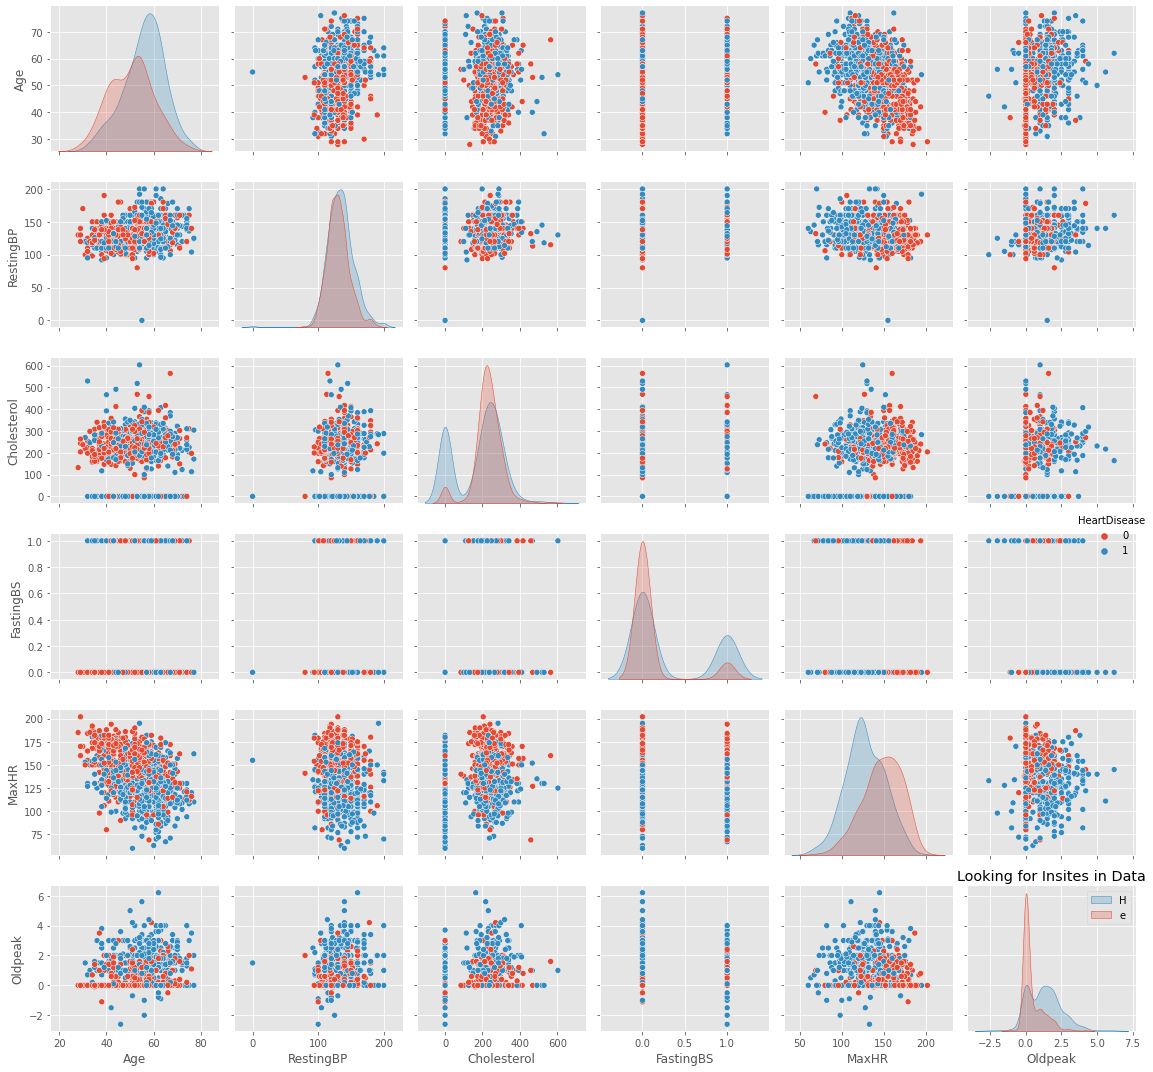

In [49]:
plt.figure(figsize=(15,10))
sns.pairplot(dataframe,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

# Data Preprocessing

In [28]:
#Check for null values
dataframe.info()
categorical_columns=dataframe.select_dtypes("string").columns.to_list()
numerical_col=dataframe.select_dtypes("int64").columns.to_list()
numerical_col=numerical_col+dataframe.select_dtypes("float64").columns.to_list()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    string 
 2   ChestPainType   918 non-null    string 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    string 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    string 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    string 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), string(5)
memory usage: 86.2 KB


In [ ]:
le = LabelEncoder()
# select numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64'])
# apply label encoding
numerical_features = numerical_features.apply(LabelEncoder().fit_transform)
numerical_features.head()

##### Feature Scaling

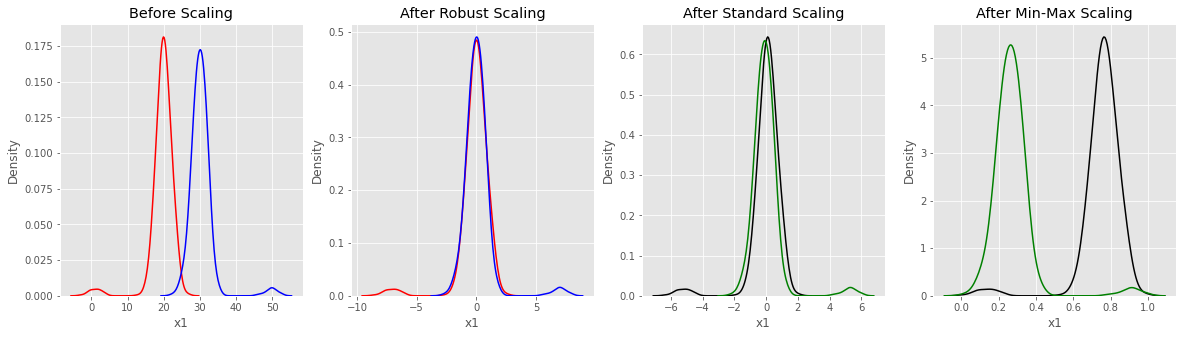

In [31]:
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])


scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])
 
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])
 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
 
sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
 
sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')
 
sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')
 
sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()
 

In [32]:
# As we will be using both types of approches for demonstration lets do First Label Ecoding 
# which will be used with Tree Based Algorthms
df_tree = dataframe.apply(LabelEncoder().fit_transform)
df_tree.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


In [36]:
## Creaeting one hot encoded features for working with non tree based algorithms 
df_nontree=pd.get_dummies(dataframe,columns=categorical_columns,drop_first=False)
target="HeartDisease"
y=df_nontree[target].values
df_nontree.drop("HeartDisease",axis=1,inplace=True)
df_nontree=pd.concat([df_nontree,dataframe[target]],axis=1)
df_nontree.head()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
1,49,160,180,0,156,1.0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,37,130,283,0,98,0.0,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
3,48,138,214,0,108,1.5,1,0,1,0,...,0,0,1,0,0,1,0,1,0,1
4,54,150,195,0,122,0.0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0


In [55]:
# separet features and target
features = df_nontree.drop(['HeartDisease'], axis=1)
labels = df_nontree['HeartDisease']
features.head()



,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [56]:
labels.head()


0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [57]:
# train test split
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)


# XGBOOST

In [60]:
# model building xgboost
from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgboost.fit(train_features, train_labels)
# predict
y_pred = xgboost.predict(test_features)
# accuracy
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(test_labels, y_pred))

Accuracy: 0.875


In [61]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        77
           1       0.92      0.86      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



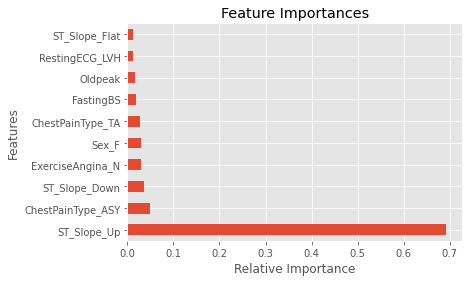

In [63]:
# Feature importance for xgboost
feat_importances = pd.Series(xgboost.feature_importances_, index=features.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

# Tune Hyper parameters

In [68]:
from sklearn.metrics import accuracy_score
import xgboost as xgb


# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [80]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': hp.quniform('n_estimators',400, 450, 500),
        'seed': 0
    }


In [83]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( train_features, train_labels), ( test_features, test_labels)]
    
    clf.fit(train_features, train_labels,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(test_features)
    accuracy = accuracy_score(test_labels, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [84]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                                                                                 
0.41847826086956524                                                                                                    
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.41847826086956524                                                                                                    
  3%|█▍                                 

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\

SCORE:                                                                                                                 
0.41847826086956524                                                                                                    
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.41847826086956524                                                                                                    
SCORE:                                                                                                                 
0.41847826086956524                                                                                                    
SCORE:                                  

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\

0.41847826086956524
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
 12%|█████▌                                        | 12/100 [00:00<00:04, 19.91trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\

SCORE:                                                                                                                 
0.41847826086956524                                                                                                    
SCORE:                                                                                                                 
0.41847826086956524                                                                                                    
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.41847826086956524                                                                                                    
 15%|██████▉                            

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\

SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.41847826086956524                                                                                                    
SCORE:                                                                                                                 
0.41847826086956524                                                                                                    
SCORE:                                                                                                                 
0.41847826086956524                                                                                                    
 19%|████████▋                          

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\

SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
 21%|█████████▋                                    | 21/100 [00:01<00:04, 16.13trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
 23%|██████████▌                                   | 23/100 [00:01<00:06, 12.73trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
 25%|███████████▌                                  | 25/100 [00:01<00:06, 11.53trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
 27%|████████████▍                                 | 27/100 [00:01<00:07, 10.42trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
 29%|█████████████▎                                | 29/100 [00:02<00:07, 10.01trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
 31%|██████████████▎                               | 31/100 [00:02<00:07,  9.79trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.41847826086956524                                                                                                    
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
 34%|███████████████▋                              | 34/100 [00:02<00:06,  9.55trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
 36%|████████████████▌                             | 36/100 [00:02<00:07,  9.04trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.41847826086956524                                                                                                    
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
 38%|█████████████████▍                            | 38/100 [00:03<00:06,  9.02trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.41847826086956524                                                                                                    
 40%|██████████████████▍                           | 40/100 [00:03<00:06,  8.82trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
 41%|██████████████████▊                           | 41/100 [00:03<00:07,  8.27trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.41847826086956524                                                                                                    
SCORE:                                                                                                                 
 43%|███████████████████▊                          | 43/100 [00:03<00:06,  8.37trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.41847826086956524                                                                                                    
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
 46%|█████████████████████▏                        | 46/100 [00:04<00:06,  8.11trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
 48%|██████████████████████                        | 48/100 [00:04<00:06,  7.95trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.41847826086956524                                                                                                    
 50%|███████████████████████                       | 50/100 [00:04<00:06,  8.05trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
 51%|███████████████████████▍                      | 51/100 [00:04<00:06,  7.73trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
 53%|████████████████████████▍                     | 53/100 [00:04<00:06,  7.71trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
 55%|█████████████████████████▎                    | 55/100 [00:05<00:05,  7.84trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.41847826086956524                                                                                                    
 58%|██████████████████████████▋                   | 58/100 [00:05<00:05,  8.08trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
 60%|███████████████████████████▌                  | 60/100 [00:05<00:04,  8.19trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
 62%|████████████████████████████▌                 | 62/100 [00:06<00:04,  8.09trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.41847826086956524                                                                                                    
 63%|████████████████████████████▉                 | 63/100 [00:06<00:04,  8.13trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
 65%|█████████████████████████████▉                | 65/100 [00:06<00:04,  7.54trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
 68%|███████████████████████████████▎              | 68/100 [00:06<00:04,  7.58trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.7989130434782609                                                                                                     


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.41847826086956524                                                                                                    
 72%|█████████████████████████████████             | 72/100 [00:07<00:03,  7.52trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
 74%|██████████████████████████████████            | 74/100 [00:07<00:03,  7.69trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.41847826086956524                                                                                                    
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
 76%|██████████████████████████████████▉           | 76/100 [00:07<00:03,  8.00trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.41847826086956524                                                                                                    
SCORE:                                                                                                                 
 77%|███████████████████████████████████▍          | 77/100 [00:08<00:02,  8.09trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.41847826086956524                                                                                                    
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
 80%|████████████████████████████████████▊         | 80/100 [00:08<00:02,  8.08trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
 82%|█████████████████████████████████████▋        | 82/100 [00:08<00:02,  8.11trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
 84%|██████████████████████████████████████▋       | 84/100 [00:08<00:01,  8.05trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
 86%|███████████████████████████████████████▌      | 86/100 [00:09<00:01,  8.09trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.41847826086956524                                                                                                    
 88%|████████████████████████████████████████▍     | 88/100 [00:09<00:01,  7.96trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.41847826086956524                                                                                                    
SCORE:                                                                                                                 
0.41847826086956524                                                                                                    
 90%|█████████████████████████████████████████▍    | 90/100 [00:09<00:01,  8.00trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
 92%|██████████████████████████████████████████▎   | 92/100 [00:09<00:01,  7.95trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
 94%|███████████████████████████████████████████▏  | 94/100 [00:10<00:00,  7.96trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
SCORE:                                                                                                                 
0.41847826086956524                                                                                                    
 96%|████████████████████████████████████████████▏ | 96/100 [00:10<00:00,  7.83trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.41847826086956524                                                                                                    
SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
 98%|█████████████████████████████████████████████ | 98/100 [00:10<00:00,  7.64trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
 99%|█████████████████████████████████████████████▌| 99/100 [00:10<00:00,  7.40trial/s, best loss: -0.7989130434782609]

C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


C:\Users\Trewon\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                                                                 
0.7989130434782609                                                                                                     
100%|█████████████████████████████████████████████| 100/100 [00:10<00:00,  9.10trial/s, best loss: -0.7989130434782609]


In [76]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.5798142034389947, 'gamma': 2.262796071658004, 'max_depth': 9.0, 'min_child_weight': 10.0, 'reg_alpha': 59.0, 'reg_lambda': 0.6484467739843979}


# Grid Search

In [92]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [ 500 ,700,800, 1000],
           'colsample_bytree': [0.3, 0.7]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(train_features,train_labels)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
Lowest RMSE:  0.3201053914320669


In [90]:

xgboost_new = XGBClassifier(colsample_bytree= 0.3, learning_rate= 0.01, max_depth = 3, n_estimators = 700)
xgboost_new.fit(train_features, train_labels)
best_y_pred=xgboost_new.predict(test_features)

print(classification_report(test_labels, y_pred))
print(classification_report(test_labels, best_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        77
           1       0.92      0.86      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        77
           1       0.92      0.90      0.91       107

    accuracy                           0.90       184
   macro avg       0.89      0.90      0.89       184
weighted avg       0.90      0.90      0.90       184



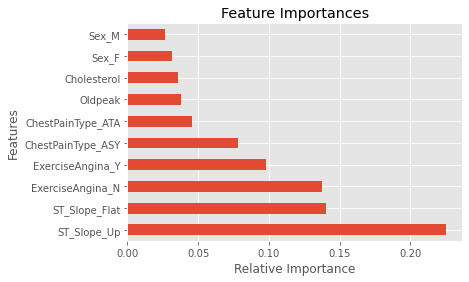

In [93]:
# Feature importance for xgboost
feat_importances = pd.Series(xgboost_new.feature_importances_, index=features.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()